In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data(path="mnist.npz")

Using TensorFlow backend.


In [2]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(
        Dense(
            num_pixels, 
            input_dim=num_pixels, 
            kernel_initializer='normal', 
            activation='relu'
        )
    )
    
    model.add(
        Dense(
            num_classes, 
            kernel_initializer='normal', 
            activation='softmax'
        )
    )
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [9]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2783 - acc: 0.9211 - val_loss: 0.1414 - val_acc: 0.9571
Epoch 2/10
 - 6s - loss: 0.1118 - acc: 0.9675 - val_loss: 0.0922 - val_acc: 0.9711
Epoch 3/10
 - 6s - loss: 0.0719 - acc: 0.9798 - val_loss: 0.0786 - val_acc: 0.9771
Epoch 4/10
 - 6s - loss: 0.0505 - acc: 0.9857 - val_loss: 0.0743 - val_acc: 0.9766
Epoch 5/10
 - 6s - loss: 0.0375 - acc: 0.9891 - val_loss: 0.0663 - val_acc: 0.9792
Epoch 6/10
 - 6s - loss: 0.0270 - acc: 0.9928 - val_loss: 0.0633 - val_acc: 0.9805
Epoch 7/10
 - 6s - loss: 0.0209 - acc: 0.9947 - val_loss: 0.0620 - val_acc: 0.9811
Epoch 8/10
 - 6s - loss: 0.0140 - acc: 0.9969 - val_loss: 0.0619 - val_acc: 0.9805
Epoch 9/10
 - 6s - loss: 0.0110 - acc: 0.9976 - val_loss: 0.0602 - val_acc: 0.9801
Epoch 10/10
 - 6s - loss: 0.0080 - acc: 0.9985 - val_loss: 0.0594 - val_acc: 0.9811
Baseline Error: 1.89%


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [12]:
# import library
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from IPython.display import Image
%matplotlib inline

In [13]:
# load (downloaded if needed) the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz")

In [14]:
# reshape to be [samples][width][height][chanel]
X_train = x_train.reshape(x_train.shape[0], 28, 28,1).astype('float32')
X_test = x_test.reshape(x_test.shape[0],  28, 28,1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs number class 10
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# shape of X,y after procesising
print("Shape of X :",X_train.shape)
print("Shape of y :",y_train.shape)

Shape of X : (60000, 28, 28, 1)
Shape of y : (60000, 10)


In [47]:
model = Sequential()

model.add(
    Conv2D(
        filters=8,
        kernel_size=(5,5),
        padding='same',
        strides=(1, 1),
        activation='relu',
        input_shape=(28, 28,1),
        name='CONV_1'    
    )
)

model.add(
    MaxPooling2D(
        pool_size=(2, 2), 
        strides=(2,2), 
        padding='valid', 
        name="MAX_POOL_1"
    )
)

model.add(Dropout(rate=0.2))

model.add(
    Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        strides=(1, 1),
        activation='relu',
        input_shape=(28, 28,1),
        name='CONV_2' 
    )
)

model.add(
    MaxPooling2D(
        pool_size=(5, 5), 
        strides=(3,3), 
        padding='valid', 
        name="MAX_POOL_2"
    )
)

model.add(
    Flatten(name="FLATTEN")
)

model.add(Dropout(rate=0.2))

model.add(
    Dense(
        units=512,
        activation='relu',
        name="DENSE_1"
    )
)

model.add(
    Dense(
        units=10,
        activation='softmax',
        name="DENSE_2"
    )
)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CONV_1 (Conv2D)              (None, 28, 28, 8)         208       
_________________________________________________________________
MAX_POOL_1 (MaxPooling2D)    (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
CONV_2 (Conv2D)              (None, 14, 14, 16)        1168      
_________________________________________________________________
MAX_POOL_2 (MaxPooling2D)    (None, 4, 4, 16)          0         
_________________________________________________________________
FLATTEN (Flatten)            (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
__________

In [49]:
# Fit the model
hist = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=5, 
    batch_size=512
)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

print("Accuary score :", scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 31s 512us/step - loss: 0.8524 - acc: 0.7417 - val_loss: 0.1950 - val_acc: 0.9456
Epoch 2/5
60000/60000 [==============================] - 30s 501us/step - loss: 0.2351 - acc: 0.9285 - val_loss: 0.1024 - val_acc: 0.9681
Epoch 3/5
60000/60000 [==============================] - 30s 500us/step - loss: 0.1704 - acc: 0.9469 - val_loss: 0.0716 - val_acc: 0.9786
Epoch 4/5
60000/60000 [==============================] - 30s 500us/step - loss: 0.1319 - acc: 0.9592 - val_loss: 0.0614 - val_acc: 0.9821
Epoch 5/5
60000/60000 [==============================] - 30s 507us/step - loss: 0.1171 - acc: 0.9638 - val_loss: 0.0502 - val_acc: 0.9834
Accuary score : 0.9834


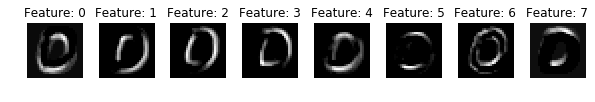

In [52]:
# Visualize 8 filter of convolution 1 :
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer("CONV_1").output)
intermediate_output = intermediate_layer_model.predict(np.expand_dims(X_test[10],axis=0))
plt.figure(figsize=(10,10),)
for i in range(intermediate_output.shape[-1]):
    plt.subplot(4,8,i+1) 
    plt.subplots_adjust(left  = 0.125 ,right = 0.9 , bottom = 0.1,top = 0.9  ,wspace = 0.3 ,hspace = 0.1 )
    plt.axis("off")
    plt.title("Feature: " +str(i))
    im = intermediate_output[:,:,:,i]
    plt.imshow(np.squeeze(im), cmap=plt.get_cmap('gray'))

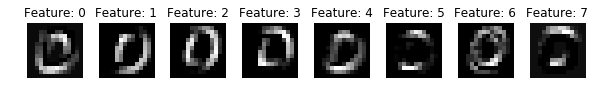

In [55]:
# Visualize 8 filter of convolution 1 :
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer("MAX_POOL_1").output)
intermediate_output = intermediate_layer_model.predict(np.expand_dims(X_test[10],axis=0))
plt.figure(figsize=(10,10),)
for i in range(intermediate_output.shape[-1]):
    plt.subplot(4,8,i+1) 
    plt.subplots_adjust(left  = 0.125 ,right = 0.9 , bottom = 0.1,top = 0.9  ,wspace = 0.3 ,hspace = 0.1 )
    plt.axis("off")
    plt.title("Feature: " +str(i))
    im = intermediate_output[:,:,:,i]
    plt.imshow(np.squeeze(im), cmap=plt.get_cmap('gray'))